<a href="https://colab.research.google.com/github/ulitsaRaskolnikova/github-slideshow/blob/main/23_02_2022_individual_work_Malyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving amazon_alexa.tsv to amazon_alexa.tsv
User uploaded file "amazon_alexa.tsv" with length 514752 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!cd /content/
!mkdir reviews-dataset
!cd /content/reviews-dataset

In [ ]:
!kaggle datasets download -d nicapotato/amazon_alexa -p /content/reviews-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'Магическая' функция matplotlib
%matplotlib inline 

# Есть пять предустановленная тем Seaborn: darkgrid, whitegrid, dark, white, 
# и ticks. Каждый из них подходит для различных приложений и личных предпочтений.
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
CURENT_DIR = '/content/reviews-dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузить набор данных
data = pd.read_csv(CURENT_DIR+'/amazon_alexa.zip', sep="\t")

# Распечать первые 5 строк фрейма данных
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df = data[['verified_reviews', 'rating']]
df.head()

,verified_reviews,rating
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5


In [ ]:
df.dtypes

verified_reviews    object
rating               int64
dtype: object

In [ ]:
df['verified_reviews'] = df['verified_reviews'].astype(str)

In [ ]:
for col in df.columns:
    print('{} - {}'.format(col, df[df[col].isnull()].shape[0]))

verified_reviews - 0
rating - 0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['rating'], random_state=1)

In [ ]:
print('X_train: {}  y_train: {}'.format(X_train.shape, y_train.shape))
print('X_test: {}  y_test: {}'.format(X_test.shape, y_test.shape))

X_train: (2362,)  y_train: (2362,)
X_test: (788,)  y_test: (788,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'Absolutely wonderful - silky and sexy and comfortable',
     'Love this dress! its sooo pretty. i happened to find it in a store, and im glad i did bc i never would have ordered it online bc its petite. i bought a petite and am 5 8. i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.',
     'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c	',
     'I love, love, love this jumpsuit. its fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!	',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
vectorizer.get_feature_names_out()

array(['absolutely', 'am', 'and', 'bc', 'be', 'below', 'bottom', 'bought',
       'but', 'cheap', 'comfortable', 'compliments', 'could',
       'definitely', 'design', 'did', 'directly', 'dress', 'every',
       'fabulous', 'fact', 'find', 'fit', 'flaw', 'flirty', 'for',
       'found', 'fun', 'get', 'glad', 'great', 'had', 'half', 'happened',
       'have', 'high', 'hits', 'hopes', 'im', 'imo', 'in', 'initially',
       'into', 'is', 'it', 'its', 'jumpsuit', 'just', 'knee', 'layer',
       'layers', 'length', 'little', 'love', 'major', 'me', 'medium',
       'midi', 'my', 'net', 'never', 'nicely', 'not', 'nothing', 'ok',
       'on', 'online', 'ordered', 'outrageously', 'over', 'overall',
       'petite', 'pretty', 'really', 'reordered', 'several', 'sewn',
       'sexy', 'silky', 'size', 'small', 'so', 'someone', 'somewhat',
       'sooo', 'store', 'such', 'that', 'the', 'this', 'tight', 'time',
       'to', 'top', 'true', 'truly', 'under', 'up', 'usual', 'very',
       'wanted', 'was

In [ ]:
print(X.toarray())

[[1 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0]
 [0 1 2 2 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 2 2 0 1 1 0 0 1 1 2 0 1 0 1 0 0 1 0 0 0 0 2 1 1 0 0 0 3
  1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 2 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 2
  0 0]
 [0 0 3 0 1 0 1 0 2 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 2 1 0 0 0 0 2 2 0 0 1
  0 1 0 1 2 1 1 0 4 0 0 1 0 2 1 0 0 0 1 1 1 0 1 2 0 1 1 0 1 0 0 1 1 2 1 2
  0 1 1 1 1 0 0 1 3 1 0 1 0 0 1 1 5 2 1 0 2 1 0 0 1 1 1 1 1 3 0 1 0 0 1 0
  1 1]
 [0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0]]


In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)

In [ ]:
vectorizer2.get_feature_names_out()

array(['absolutely wonderful', 'am love', 'and am', 'and comfortable',
       'and fabulous', 'and fit', 'and im', 'and really', 'and several',
       'and sexy', 'bc its', 'bc never', 'be outrageously', 'be true',
       'below the', 'bottom half', 'bought petite', 'but found',
       'but great', 'but the', 'cheap net', 'comfortable and',
       'could not', 'definitely be', 'design flaw', 'did bc',
       'directly into', 'dress and', 'dress its', 'every time',
       'fabulous every', 'fact that', 'find it', 'fit nicely', 'flaw was',
       'flirty and', 'for me', 'for this', 'found this', 'fun flirty',
       'get nothing', 'glad did', 'great compliments', 'had such',
       'had very', 'half had', 'half was', 'happened to', 'have ordered',
       'high hopes', 'hits just', 'hopes for', 'im glad', 'imo major',
       'in fact', 'in petite', 'in store', 'initially ordered',
       'into the', 'is truly', 'it get', 'it in', 'it online', 'it to',
       'it up', 'its fun', 'its petit

In [ ]:
print(X2.toarray())

[[1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1
  0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
  0 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0
  1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0
  1 1 1 0 0 0 0 0 1 0 1 1 0 1 2 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1
  1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1
  1 1 1 1 1 0 1 0 0 1 0 0 1 1]
 [0 0 0 0 1 0 0 0 0

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='unicode', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
len(cv.get_feature_names_out())

3282

In [ ]:
len(X_test_cv.toarray()[0])

3282

In [ ]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
word_freq_df.head()

,100x,1100sf,1rst,1st,2nd,2package,30pm,3rd,3x,3xs,4am,4ghz,4k,5am,5ghz,5th,6th,80s,abc,abilities,ability,able,abode,absolutely,absolutly,ac,accent,acceptable,access,accessable,accessible,accessing,accessories,accident,accidentally,accomplish,accomplished,according,accordingly,account,...,worry,worse,worst,worth,worthless,worthy,wouldn,wow,writing,wrong,www,x,xbox,xfinity,xm,y,yard,yards,yeah,year,years,yell,yelling,yellow,yep,yes,yesterday,yhe,young,youngest,youtube,yr,yrs,yup,z,zero,zigbee,zonked,zzzz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
word_freq_df.sum()

100x        1
1100sf      2
1rst        1
1st        11
2nd        28
           ..
zero        3
zigbee      4
zonked      1
zzzz        1
zzzzzzz     1
Length: 3282, dtype: int64

In [ ]:
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)
top_words_df.head()

,0
love,713
echo,616
great,524
t,456
alexa,437


In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy score: ', accuracy_score(y_test, predictions)) 
print('Precision score: ', precision_score(y_test, predictions.astype(int), average='macro'))
print('Recall score: ', recall_score(y_test, predictions.astype(int), average='macro'))

Accuracy score:  0.766497461928934
Precision score:  0.6430137652609562
Recall score:  0.31602634217482456


Text(80.90000000000006, 0.5, 'predicted label')

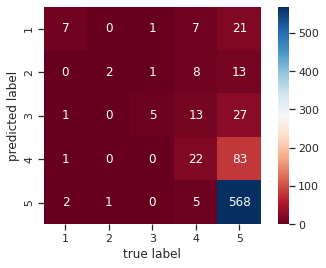

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', fmt="d",
xticklabels=np.arange(1,6).astype(str), yticklabels=np.arange(1,6).astype(str))
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
X_check = np.array(["I don't like this thing, it sucks.", 
                    "I hate this thing. I don not like her. I do not know what to do. This thing is not worth the money.",
                    "I love these clothes",
                    "The dress is too small for me.",
                    "It was huge, shapeless."])
X_check_cv = cv.transform(X_check)
predictions_check = naive_bayes.predict(X_check_cv)
predictions_check

array([5, 5, 5, 5, 5])